---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

## What is Machine Learning(ML) ?
#### The study of computer programs (algorithms) that can learn by example
#### ML algorithms can generalize from existing examples of a task
---- e.g. after seeing a training set of labeled images, an image classifier can figure out how to apply labels accurately to new, previously unseen images.

### Machine Learning Models can learn by example
#### Algorithms learn rules from labelled examples
#### A set of labelled examples used for learning is called training data.
#### The learned rules should also be able to generalize to correclt recognize or predict new examples not in the training set.

### Key Types of Machine Learning Probems
#### Supervised machine learning: Learn to predict target values from labelled data
---- Classification (target values are discrete classes)
---- Regression (target values are continuous values )
#### Unsupervised machine learning: Find structure in unlabeled data
---- Find groups of similar instances in the data (clustering)
---- Finding unusual patters (outlier detection)

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import scipy as sp
## scipy provides a variety of useful scientific computing tools, including statistical distributions, optimization of functions
## linear algebra, and a variety of specialized mathematical functions.
## With scikit-learn, it provides support for sparse matrices.
## scikit-learn(sklearn) package is based on numpy and scipy
fruits = pd.read_csv('fruit_data_with_colors.txt', sep='\t')

In [5]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [24]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [16]:
fruits.shape
## 59 rows of objects with 7 columns of features

(59, 7)

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

### Reason why examine the data
---- 1. Inspecting feature values may help identify what cleaning or preprocessing still needs to be done once you can see the range or distribution of values that is typical for each attribute.
---- 2. You might notice missing or noisy data, or inconsistencies such as the wrong data type being used for a column, incorrect units of measurements for a particular column, or that there are not enough examples of a particular class.
---- 3. You may realize that your problem is actually solvable without machine learning.

(44, 4)
(15, 4)
(44,)
(15,)


<IPython.core.display.Javascript object>


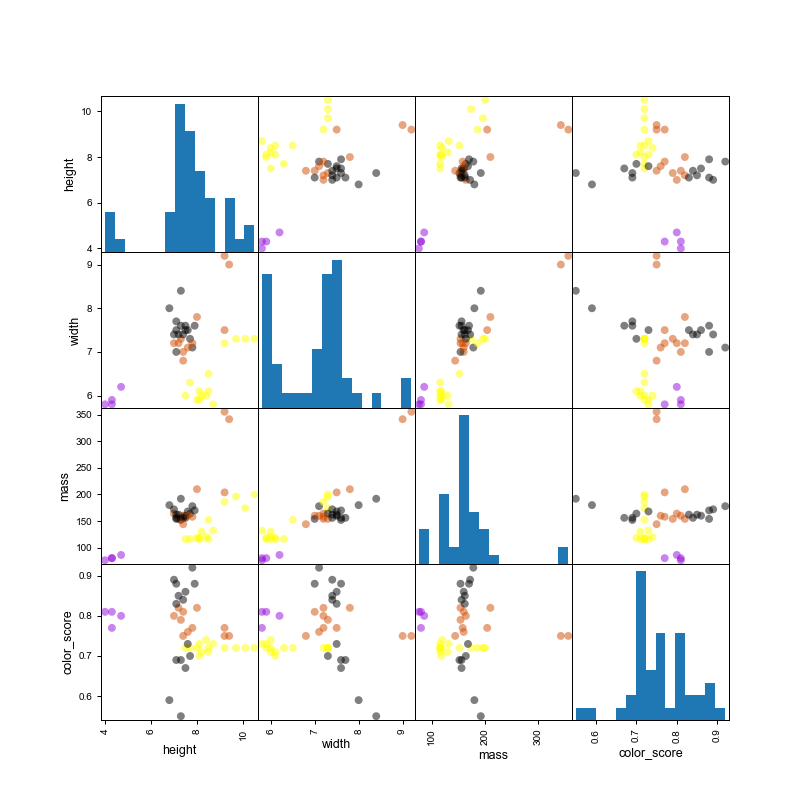

In [18]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
## Default test size = 0.25 and train size = 0.75
## random_state = parameter provides a seed value to the function's internal random number generator
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

cmap = cm.get_cmap('gnuplot')
from pandas.plotting import scatter_matrix
## feature pair plots -- usually this plot is suitable for sample with less features(<20)
scatter = scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


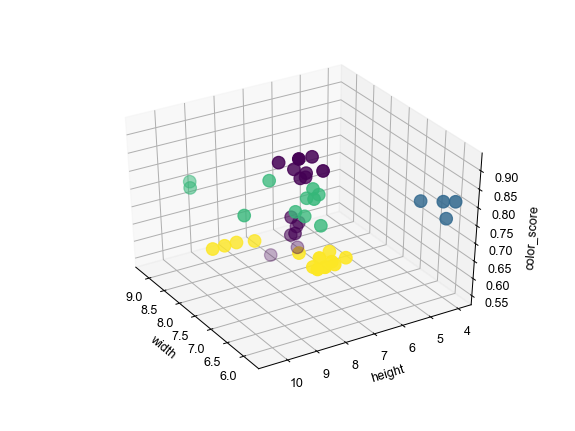

In [8]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [19]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

### K-Nearest Neighbors Classification (K-NN) 
--- an instance/memory based supervised learning

--- K refers to the number of nearest neighbors the classifier will retrieve/use to make its predictions

### The k-Nearest Neighbor (k-NN) Classifier Algorithm
#### Given a training set X_train with labels y_train, and given a new instance x_test to be classified
---- 1. Find the most similar instances (let's call then X_NN) to x_test that are in X_train

---- 2. Get the labels y_NN for the instances in X_NN

---- 3. Predict the label for x_test by combining th elabels y_NN
e.g. simple majority vote

### A nearest neighbor algorithm needs four things specified
---- 1. A distance metric (Equally weighted --  Euclidean Distance) eg: Typically Eclidean (Minkowski with p = 2)

---- 2. How many 'nearest' neighbors to look at?  -- k

---- 3. Optional weighting function on the neighbor points  -- Sometimes ignored

---- 4. Method for aggregating the classes of neighbor points -- eg: (Class with the most representatives among nearest neighbors)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [22]:
knn.score(X_test, y_test)
# The accuracy rate is 0.53333

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [25]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [26]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

C:\Users\D17911\Downloads\Applied Data Science with Python Specialization\Applied Machine Learning in Python\adspy_shared_utilities.py:172: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
C:\Users\D17911\Downloads\Applied Data Science with Python Specialization\Applied Machine Learning in Python\adspy_shared_utilities.py:173: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


<IPython.core.display.Javascript object>


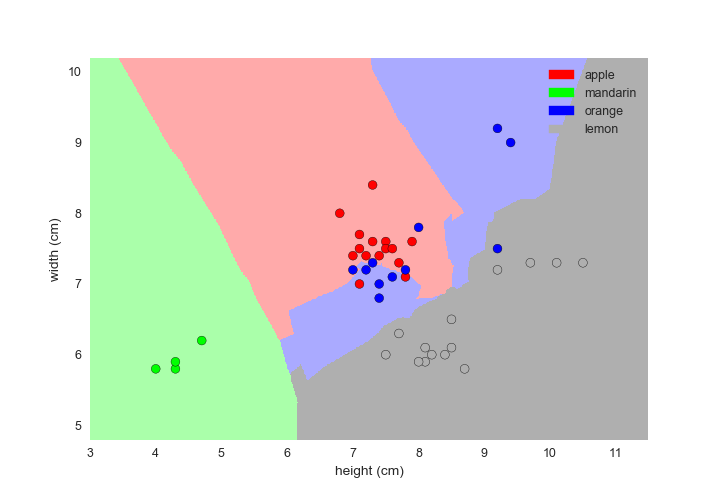

In [31]:
import graphviz
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors
# 'uniform' is the weighting method to be used, 'uniform' means treat all neighbors equally when combining their labels.
## 'uniform' can be replaced by 'distance' or your own function

C:\Users\D17911\Downloads\Applied Data Science with Python Specialization\Applied Machine Learning in Python\adspy_shared_utilities.py:172: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
C:\Users\D17911\Downloads\Applied Data Science with Python Specialization\Applied Machine Learning in Python\adspy_shared_utilities.py:173: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


<IPython.core.display.Javascript object>


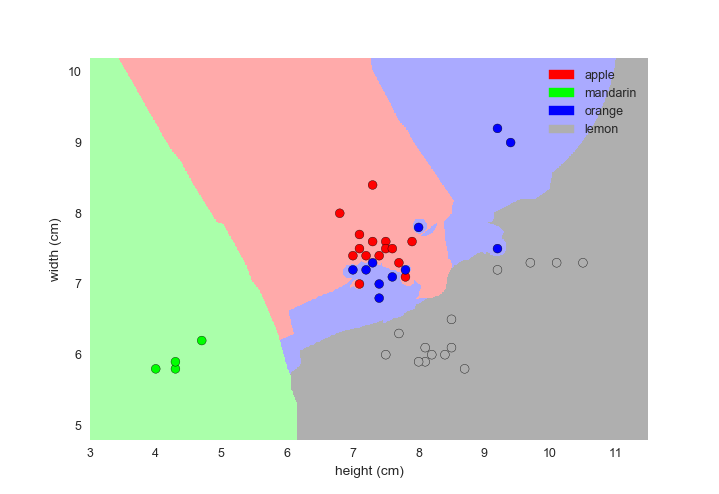

In [32]:
## The decision boundary will be different if we use different parameters of k and weighting methods
plot_fruit_knn(X_train, y_train, 5, 'distance') 

In [33]:
## When k = 1 smaller, the prediction(decision boundary) is sensitive to noise, outliers, milslabeled data
## for larger values of k, the area assigned to different classes are smoother and not as fragmented and more robust to noise in the individual points.

#### Phenomenon of bias-variance tradeoff in later class

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


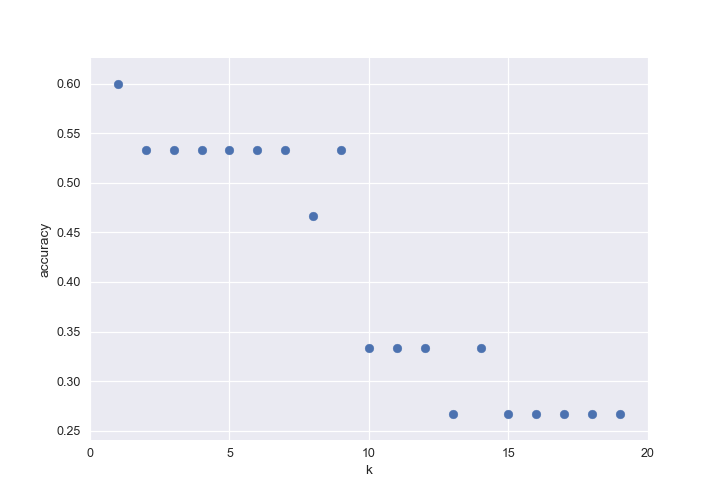

In [34]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);
## in this example, larger k leads to worse accuracy for this particular dataset and fixed single train test split

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


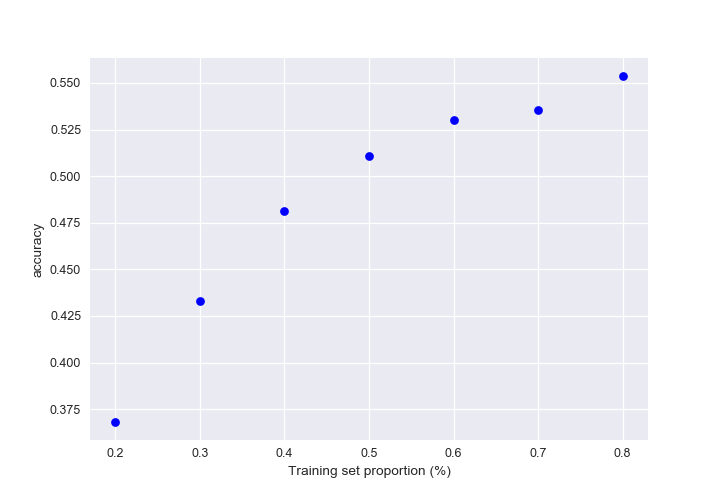

In [35]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

#### Multiple Choices Solution
---- 1. A low value of 'k' (close to 1) is more likely to overfit the training data and lead to worse accuracy on the test data, compared to higher values of 'k'.

---- 2. Setting 'k' to the number of points in the training set will result in a classifier that always predicts the majority class.

---- 3. The k-nearest neighbors classification algorithm has to memorize all of the training examples to make a prediciton.